In [1]:
# Import libraries

import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
from patsy import dmatrix
import datetime
from scipy.stats import chisquare

# Pretty display for notebooks

%matplotlib inline


# Allows the use of display() for DataFrames
from IPython.display import display 

# Ignore the warnings
import warnings
warnings.filterwarnings('ignore')

# Load the dataset
train = pd.read_csv("../asset/train.csv")
test = pd.read_csv("../asset/test.csv")
weather = pd.read_csv("../asset/weather.csv")
key = pd.read_csv("../asset/key.csv")
submission_example = pd.read_csv("../asset/sampleSubmission.csv")

# Success - Display the first record
print("Train data : ", train.shape)
print("Test  data : ", test.shape)
print("weather  data : ", weather.shape)
print("key  data : ", key.shape)
print("submission  data : ", submission_example.shape)

coulmns_should_be_integer_type_of_data = ["tmax", "tmin", "tavg", "dewpoint", "wetbulb", "heat", "cool"]
coulmns_should_be_float_type_of_data = ["snowfall", "preciptotal", "stnpressure", "sealevel", "depart",\
                                        "resultspeed", "resultdir", "avgspeed"]

import pickle
import costum_functions as cf

# 원본을 유지하기 위해서 카피
df_train = train.copy()
df_weather = weather.copy()
df_key = key.copy()
df_train_with_weather = pd.read_csv("df_train_with_weather_201806251508.csv")

def addDays(date):
    temp = date.split("-")
    year, month, date = int(temp[0]), int(temp[1]), int(temp[2])
    return datetime.datetime(year, month, date).weekday()
df_train_with_weather["day"] = df_train_with_weather["date"].apply(addDays)

Train data :  (4617600, 4)
Test  data :  (526917, 3)
weather  data :  (20517, 20)
key  data :  (45, 2)
submission  data :  (526917, 2)


In [2]:
df_train_with_weather["units"].tail()

4617595    0
4617596    0
4617597    0
4617598    0
4617599    2
Name: units, dtype: int64

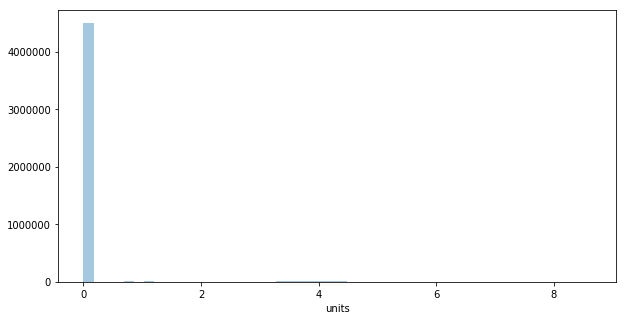

In [5]:
plt.figure(figsize=(10, 5))
sns.distplot(df_train_with_weather["units"], kde = False)

In [ ]:
plt.figure(figsize=(10, 5))
sns.distplot(df_train_with_weather["units"], kde = False)

In [15]:
df = df_train_with_weather[["item_nbr", "units"]]

In [16]:
df = df.groupby("item_nbr").agg(["max", "mean"])

In [17]:
df.tail()

units          
           max      mean
item_nbr                
107          7  0.012837
108         21  0.049159
109         30  0.101154
110         94  0.033702
111         12  0.006106

In [18]:
item_1 = df_train_with_weather[df_train_with_weather["item_nbr"] == 1]

In [19]:
item_1_without_tmax_M =item_1[item_1["tmax"] != "M"]

In [20]:
item_1_without_tmax_M["tmax"] = item_1_without_tmax_M["tmax"].astype(int)

In [21]:
xx = np.linspace(-12, 115, 40596)

In [22]:
df_train_with_weather["date"] = df_train_with_weather["date"].apply(cf.dateToNumeric)

In [23]:
df_weather["station_nbr"].unique()

array([ 1,  2,  3,  4,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20,  5], dtype=int64)

In [35]:
df_weather.tail()

,station_nbr,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,sunrise,sunset,codesum,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed
20512,16,2014-10-31,53,34,44,M,35,41,21,0,-,-,,M,0.00,29.90,29.99,4.5,03,5.3
20513,17,2014-10-31,59,34,47,M,32,41,18,0,-,-,RA,0.0,0.00,29.72,30.39,9.2,01,9.3
20514,18,2014-10-31,67,49,58,-4,40,50,7,0,0644,1738,,0.0,0.00,29.78,30.28,10.6,36,11.2
20515,19,2014-10-31,45,33,39,-6,24,32,26,0,0624,1646,RA SN,0.1,0.02,29.51,30.24,20.4,34,20.9
20516,20,2014-10-31,68,50,59,M,39,50,6,0,-,-,,0.0,0.00,29.57,30.27,10.5,36,11.2


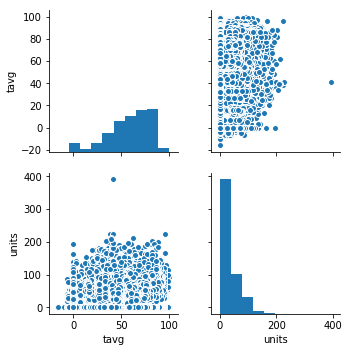

In [12]:
# 3번 스테이션의 pair plot
df = df_train_with_weather[df_train_with_weather["station_nbr"] == 3]
df = df_train_with_weather[df_train_with_weather["item_nbr"] == 45]


def changeType(a):
    if(a != "M"):
        return int(a)
    else:
        return 0

def changeFloatType(a):
    a = str(a).strip()
    if(a != "M" and a.strip() != "T"):
        return float(a)
    else:
        return 0

df["tavg"] = df["tavg"].apply(changeType)
df["units"] = df["units"].apply(changeType)
df["heat"] = df["heat"].apply(changeType)
df["cool"] = df["cool"].apply(changeFloatType)
df["depart"] = df["depart"].apply(changeType)

cols = ["tavg", "units"]
sns.pairplot(df[cols])
plt.show()